# Trabalho 01 - Aprendizado de Máquina
## Aluno: Ruan Felipe de Almeida Silva - 397048

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


### Importando os dados do dataset

In [19]:
dataframe = pd.read_csv('beans.csv')
dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


### Separando as features das classes e exibindo a quantidade desses conjuntos

In [20]:
X = dataframe.drop('Class', axis=1)
y = dataframe['Class']
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


### Exibindo a quantidade de amostras de cada uma das classes de grãos

In [21]:
y.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

### Exibindo a porcentagem de amostras de cada uma das classes de grãos

In [22]:
y.value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

### Separando os conjuntos em 75% para treino e 25% para teste

In [23]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142, stratify=y)
print("Conjunto x de treino:", len(X_train))
print("Conjunto x de teste:", len(X_test))
print("Conjunto y de treino:", len(y_train))
print("Conjunto y de teste:", len(y_test))

Conjunto x de treino: 10208
Conjunto x de teste: 3403
Conjunto y de treino: 10208
Conjunto y de teste: 3403


### Normalizando os valores das features do conjunto de treino e do conjunto de teste utilizando o MinMaxScaler

In [24]:
sc_norm = preprocessing.MinMaxScaler()
X_train_norm = sc_norm.fit_transform(X_train)
X_test_norm = sc_norm.transform(X_test)

### Plotando o histograma do conjunto de treino sem escalonamento

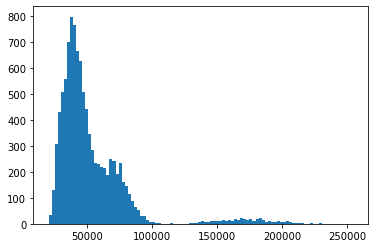

In [25]:
idx = 0
plt.hist(X_train[:, idx], bins=100);

### Plotando o histograma do conjunto de treino normalizado

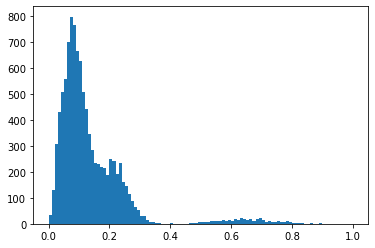

In [26]:
idx = 0
plt.hist(X_train_norm[:, idx], bins=100);

### Padronizando os valores das features do conjunto de treino e do conjunto de teste utilizando o StandardScaler

In [27]:
sc_std = preprocessing.StandardScaler()
X_train_std = sc_std.fit_transform(X_train)
X_test_std = sc_std.transform(X_test)

### Plotando o histograma do conjunto de treino sem escalonamento

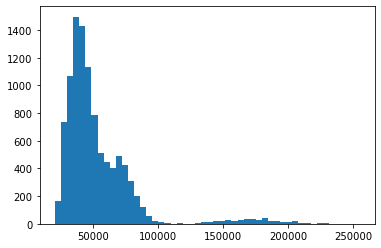

In [28]:
idx = 0
plt.hist(X_train[:, idx], bins=50);

### Plotando o histograma do conjunto de teste padronizado

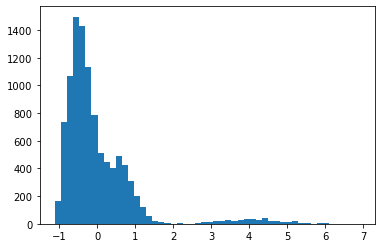

In [29]:
idx = 0
plt.hist(X_train_std[:, idx], bins=50);

### Criando diferentes modelos com o kNN Classificador utilizando diferentes valores de k e os conjuntos sem escalonamento, normalizado e padronizado.

### Os resultados das métricas obtidas em cada modelo são armazenados em um dicionário e cada um desses dicionários é adicionado a uma lista com os resultados dos modelos testados.

In [30]:
array_k = np.arange(1,11)
scalers = ['No Scaler', 'Normalized', 'Standardized']

results = []

for ind, k in enumerate(array_k):

    
    for scaler in scalers:
        if scaler == 'No Scaler':
            X_treino = X_train
            X_teste = X_test
        elif scaler == 'Normalized':
            X_treino = X_train_norm
            X_teste = X_test_norm
        elif scaler == 'Standardized':
            X_treino = X_train_std
            X_teste = X_test_std
        
        knn = KNeighborsClassifier(n_neighbors=k)    
        knn.fit(X_treino, y_train)
        y_pred = knn.predict(X_teste)
        print("Escalonamento: " + scaler)
        print(f'Predições para k = {k}:  {y_pred}') 
        test_accuracy = metrics.accuracy_score(y_test, y_pred)
        train_accuracy = knn.score(X_treino, y_train)
        precision = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=0)
        recall = metrics.recall_score(y_test, y_pred, average='weighted', zero_division=0)
        f1measure = metrics.f1_score(y_test, y_pred, average='weighted', zero_division=0)
        print('Acurácia: {:.5f}'.format(test_accuracy))

        resultado = {'Value of k':k, 'Scaler':scaler, 'Train accuracy':train_accuracy, 'Test accuracy':test_accuracy, 'Precision':precision, 'Recall':recall, 'F1-Measure':f1measure}

        results.append(resultado)
        print("\n---------------------------------------------------------------------------------\n")
 

Escalonamento: No Scaler
Predições para k = 1:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SEKER']
Acurácia: 0.73494

---------------------------------------------------------------------------------

Escalonamento: Normalized
Predições para k = 1:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.90890

---------------------------------------------------------------------------------

Escalonamento: Standardized
Predições para k = 1:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.90685

---------------------------------------------------------------------------------

Escalonamento: No Scaler
Predições para k = 2:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SEKER']
Acurácia: 0.70526

---------------------------------------------------------------------------------

Escalonamento: Normalized
Predições para k = 2:  ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.89979

--------------------------

### A lista com os resultados é utilizada para formar um dataframe. Esse dataframe é exibido em ordem decrescente pelo parâmetro acurácia de teste.

In [31]:
resultados = pd.DataFrame(results)
resultados.sort_values(by='Test accuracy', ascending=False)

,Value of k,Scaler,Train accuracy,Test accuracy,Precision,Recall,F1-Measure
14,5,Standardized,0.942006,0.924772,0.924644,0.924772,0.924634
17,6,Standardized,0.940929,0.924478,0.924269,0.924478,0.924149
16,6,Normalized,0.936422,0.924185,0.924087,0.924185,0.923909
26,9,Standardized,0.936422,0.924185,0.924193,0.924185,0.924085
23,8,Standardized,0.936422,0.923303,0.923223,0.923303,0.923076
29,10,Standardized,0.935933,0.923009,0.922857,0.923009,0.922813
22,8,Normalized,0.934855,0.923009,0.922968,0.923009,0.922878
20,7,Standardized,0.939459,0.922715,0.922699,0.922715,0.922605
28,10,Normalized,0.933190,0.922421,0.922432,0.922421,0.922355
11,4,Standardized,0.944847,0.922421,0.922234,0.922421,0.921945


### Apresentação dos gráficos que analisam o valor das métricas analisadas (accuracy, precision, recall, f1-measure) em função do valor de k para os modelos com os conjuntos sem escalonamento, normalizado e padronizado. 

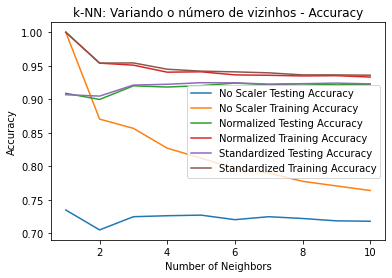

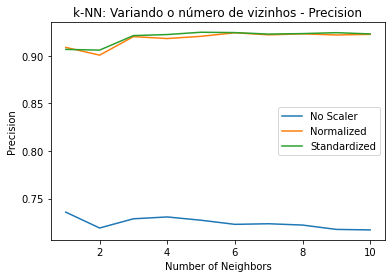

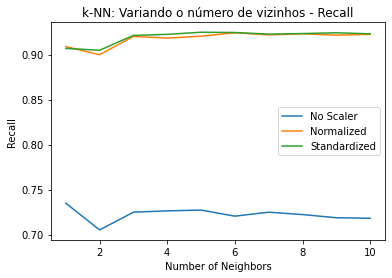

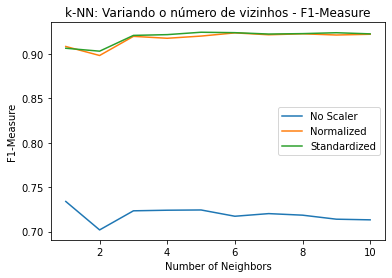

In [32]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Measure']
for metric in metrics:    
    for scaler in scalers:
        if metric == 'Accuracy':
            train_accuracy = resultados.loc[(resultados['Scaler']) == scaler, 'Train accuracy']
            test_accuracy = resultados.loc[(resultados['Scaler']) == scaler, 'Test accuracy']    
            plt.plot(array_k, test_accuracy, label = f'{scaler} Testing Accuracy')
            plt.plot(array_k, train_accuracy, label = f'{scaler} Training Accuracy')
        else:
            values_metric = resultados.loc[(resultados['Scaler']) == scaler, metric]
            plt.plot(array_k, values_metric, label = f'{scaler}')
            
    
    plt.title(f'k-NN: Variando o número de vizinhos - {metric}')    
    plt.legend()
    plt.xlabel('Number of Neighbors')
    plt.ylabel(metric)
    plt.show()